<a href="https://colab.research.google.com/github/Gitesh1209/ml-opensource/blob/main/Cotton_Plant_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Fri Oct  2 13:22:03 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     7W /  75W |      0MiB /  7611MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [ ]:
train_path = r'/content/drive/My Drive/Cotton Plant Disease/data/train'
val_path = r'/content/drive/My Drive/Cotton Plant Disease/data/val'

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [ ]:
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.5,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

training_data = training_datagen.flow_from_directory(train_path,
                                                     target_size=(150,150),
                                                     batch_size=32,
                                                     class_mode='binary')

Found 1951 images belonging to 4 classes.


In [ ]:
training_data.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [ ]:
valid_datagen = ImageDataGenerator(rescale=1./255)

valid_data = valid_datagen.flow_from_directory(val_path,
                                              target_size=(150,150),
                                              batch_size=32,
                                              class_mode='binary')

Found 324 images belonging to 4 classes.


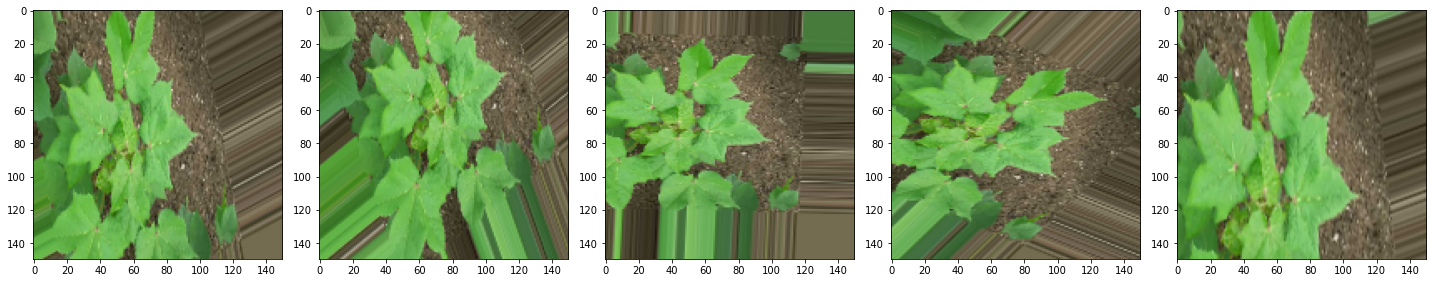

In [ ]:
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [ ]:
model_path = '/content/drive/My Drive/Cotton Plant Disease\model.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
cnn_model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=3,input_shape=[150,150,3]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=64,kernel_size=3),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=128,kernel_size=3),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256,kernel_size=3),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(units=256,activation='relu'),
    keras.layers.Dropout(0.25),
    
    keras.layers.Dense(units=4,activation='softmax'),
])

In [ ]:
cnn_model.compile(optimizer=Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 256)      

In [ ]:
history = cnn_model.fit(training_data, 
                          epochs=500, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list)

Epoch 1/500
61/61 [==============================] - ETA: 0s - loss: 1.2312 - accuracy: 0.4531
Epoch 00001: val_accuracy improved from -inf to 0.49383, saving model to /content/drive/My Drive/Cotton Plant Disease\model.h5
61/61 [==============================] - 491s 8s/step - loss: 1.2312 - accuracy: 0.4531 - val_loss: 1.0683 - val_accuracy: 0.4938
Epoch 2/500
61/61 [==============================] - ETA: 0s - loss: 1.0601 - accuracy: 0.5459
Epoch 00002: val_accuracy did not improve from 0.49383
61/61 [==============================] - 23s 383ms/step - loss: 1.0601 - accuracy: 0.5459 - val_loss: 1.0216 - val_accuracy: 0.4815
Epoch 3/500
61/61 [==============================] - ETA: 0s - loss: 0.9769 - accuracy: 0.5874
Epoch 00003: val_accuracy improved from 0.49383 to 0.58951, saving model to /content/drive/My Drive/Cotton Plant Disease\model.h5
61/61 [==============================] - 25s 413ms/step - loss: 0.9769 - accuracy: 0.5874 - val_loss: 0.9301 - val_accuracy: 0.5895
Epoch 4/5

In [ ]:
model_path2 = '/content/drive/My Drive/Cotton Plant Disease\model2.h5'
cnn_model.save(model_path2)
